In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
import pprint 
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
#reading the dataset
df= pd.read_csv('Iris Dataset.csv')

In [151]:
#printing the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [152]:
#finding different class labels 
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [153]:
#finding the dimension of the dataset
df.shape

(150, 6)

In [154]:
#checking for Null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [155]:
#separating the data and target
X=pd.DataFrame(df,columns=['SepalLengthCm','SepalWidthCm', 'PetalLengthCm','PetalWidthCm'])
y=pd.DataFrame(df,columns=['Species'])

In [156]:
#printing the data
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [157]:
#checking for the dimension of the data
X.shape

(150, 4)

In [158]:
#printing the target-species
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [159]:
#checking for dimension of the target-species
y.shape

(150, 1)

In [160]:
#converting the target to numpy array form
target= pd.DataFrame(y)
target_names=target.to_numpy()

In [161]:
#printing the target in array form
target_names

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [162]:
#scaling using standard scaling function
X_std = StandardScaler().fit_transform(X)
print (X_std[0:5])
print ("The shape of Feature Matrix is -",X_std.shape)

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
The shape of Feature Matrix is - (150, 4)


In [163]:
#forming the covariance matrix of the data
X_covariance_matrix = np.cov(X_std.T)

In [164]:
#printing the covariance matrix
X_covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [165]:
#forming and printing of the eigen values and vectors
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [166]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
   print(i[0])

Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [167]:
#prinitng the variance and cumulative variance of each component
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.77045209  95.80097536  99.48480732 100.        ]


In [168]:
print ("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),eig_pairs[1][1].reshape(4,1)))
print ('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.930353775589317,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173419,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648163944,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.02074601399559593,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]
----------------------------------------
Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [169]:
#predicted values as an array
Y = X_std.dot(matrix_w)
Y.shape

(150, 2)

In [170]:
#predicted value being converted to dataframe form
new_df = pd.DataFrame(np.hstack((Y,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Species'])

In [171]:
new_df.head()

,1st_component,2nd_component,Species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.36795,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


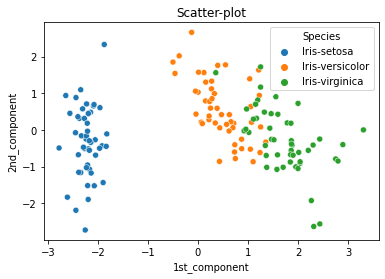

In [172]:
#plotting data
sns.scatterplot(new_df['1st_component'],new_df['2nd_component'],hue=new_df['Species'])
plt.title('Scatter-plot')
plt.show()